In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNetCV 
from sklearn.preprocessing import StandardScaler 
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import KFold, GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingRegressor, VotingClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.utils import shuffle
import warnings
SET_FIT_INTERCEPT = True
warnings.filterwarnings('ignore')

In [124]:
df_train = pd.read_csv('assignment4_train.csv')
df_test = pd.read_csv('assignment4_test.csv')
df_full = pd.concat([df_train, df_test], keys=['df_train', 'df_test'])

In [67]:
df_train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [68]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [69]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


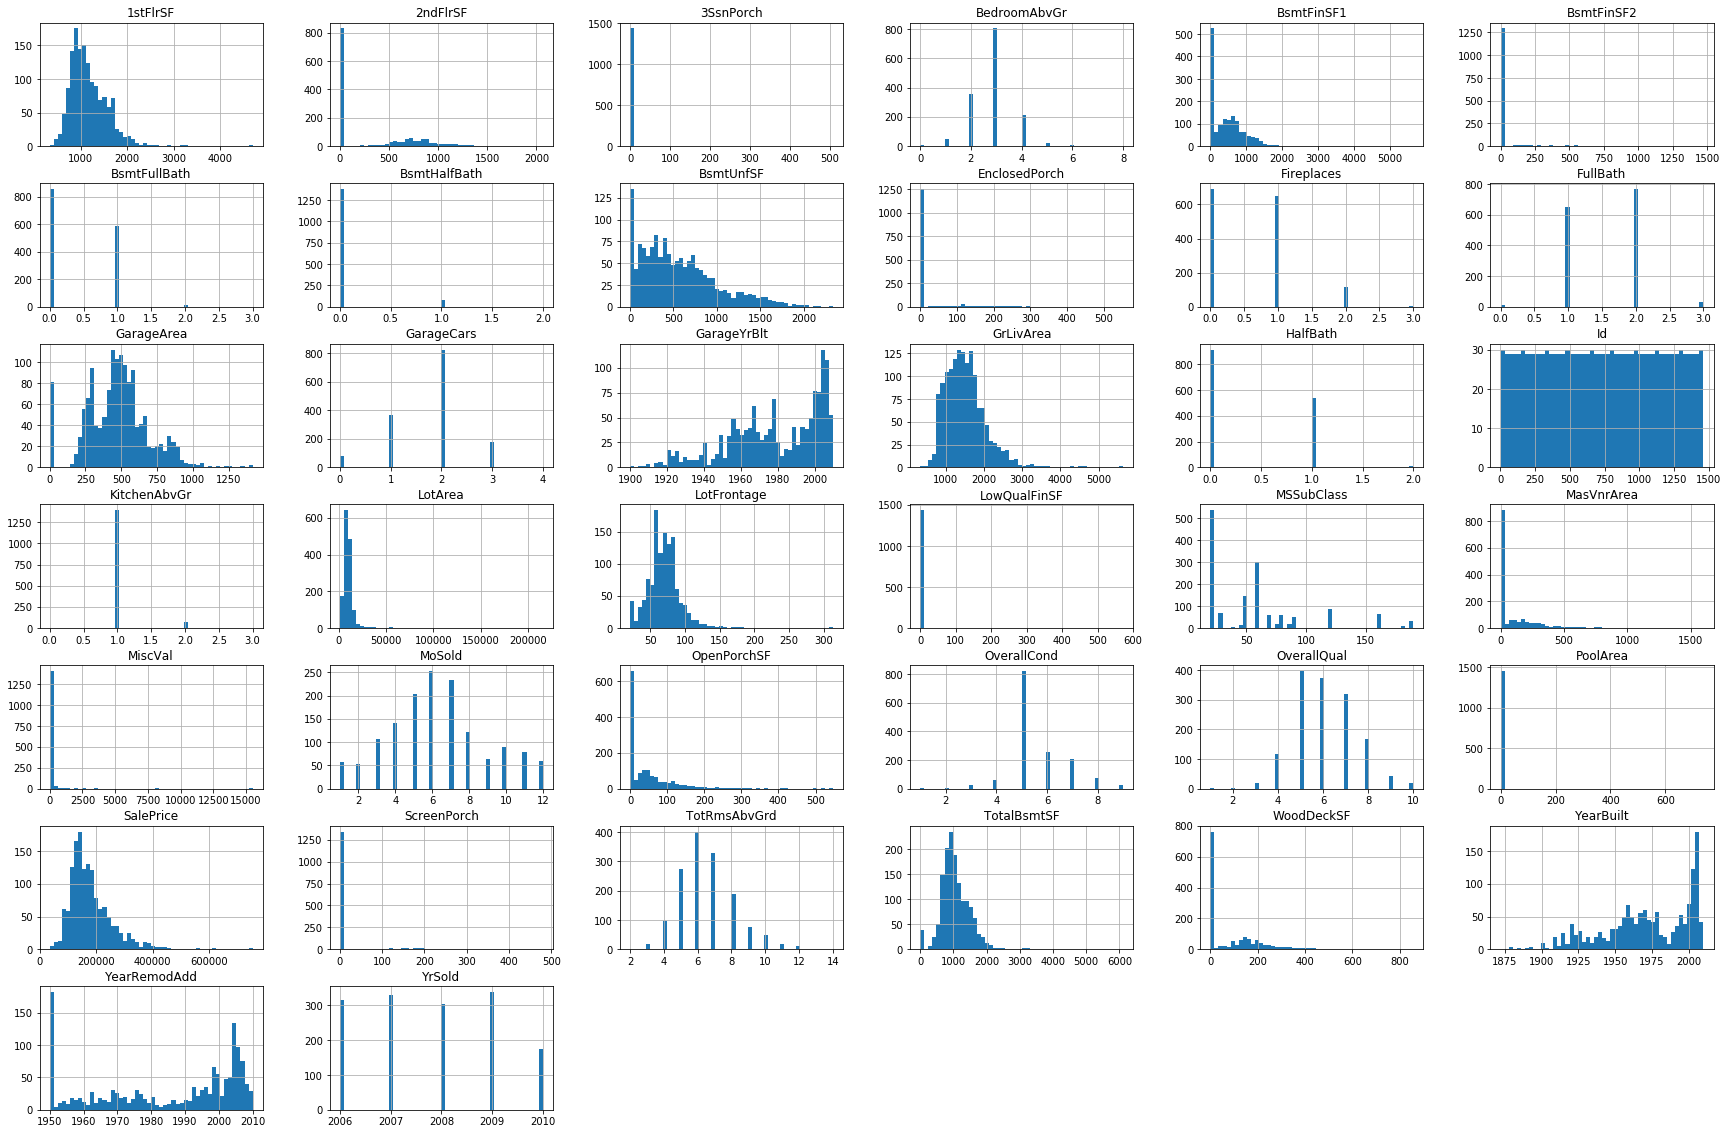

In [70]:
df_train.hist( bins = 50, figsize = (30, 20)); plt.show()

In [71]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [125]:
df_train2 = df_train.copy()
df_test2 = df_test.copy()

In [126]:
df_train2.drop(['PoolQC', 'MiscFeature','MiscVal', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','LowQualFinSF','PoolArea'], axis=1, inplace=True)
df_test2.drop(['PoolQC', 'MiscFeature','MiscVal', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','LowQualFinSF','PoolArea'], axis=1, inplace=True)
df_full.drop(['PoolQC', 'MiscFeature','MiscVal', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','LowQualFinSF','PoolArea'], axis=1, inplace=True)

In [127]:
total = df_train2.isnull().sum().sort_values(ascending=False)
percent = (df_train2.isnull().sum()/df_train2.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
GarageCond,81,0.055479
GarageQual,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479
BsmtExposure,38,0.026027
BsmtFinType2,38,0.026027
BsmtQual,37,0.025342
BsmtFinType1,37,0.025342
BsmtCond,37,0.025342


In [75]:
corr_matrix = df_train2.corr()
corr_matrix["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtHalfBath    -0.016844
Id              -0.021917
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [128]:
df_train_lab = df_train.pop("SalePrice")

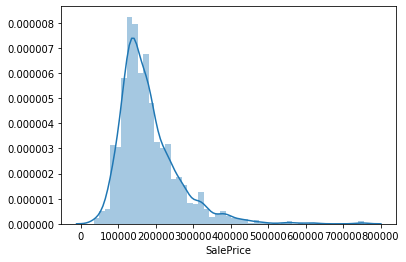

In [129]:
ax = sns.distplot(df_train_lab)

In [130]:
df_train_lab = np.log(df_train_lab)

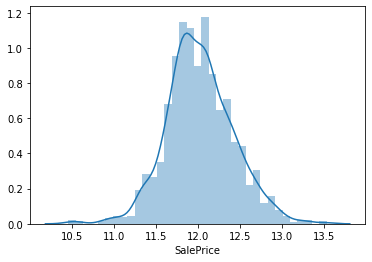

In [131]:
ax = sns.distplot(df_train_lab)

In [80]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [132]:
df_full['MSSubClass'] = df_full['MSSubClass'].astype(str)

df_full['MSZoning'] = df_full['MSZoning'].fillna(df_full['MSZoning'].mode()[0])

df_full.OverallCond = df_full.OverallCond.astype(str)

df_full['MasVnrArea'] = df_full['MasVnrArea'].fillna(df_full['MasVnrArea'].mode()[0])
df_full['MasVnrType'] = df_full['MasVnrType'].fillna(df_full['MasVnrType'].mode()[0])

# BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2
# NA in all. NA means No basement
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df_full[col] = df_full[col].fillna('NoBSMT')

df_full['TotalBsmtSF'] = df_full['TotalBsmtSF'].fillna(0)

df_full['Electrical'] = df_full['Electrical'].fillna(df_full['Electrical'].mode()[0])
df_full['Heating'] = df_full['Heating'].fillna(df_full['Heating'].mode()[0])
df_full['Utilities'] = df_full['Utilities'].fillna(df_full['Utilities'].mode()[0])
df_full['RoofMatl'] = df_full['RoofMatl'].fillna(df_full['RoofMatl'].mode()[0])

df_full['BsmtFullBath'] = df_full['BsmtFullBath'].fillna(df_full['BsmtFullBath'].mode()[0])
df_full['BsmtHalfBath'] = df_full['BsmtHalfBath'].fillna(df_full['BsmtHalfBath'].mode()[0])
df_full['Functional'] = df_full['Functional'].fillna(df_full['Functional'].mode()[0])
df_full['GarageArea'] = df_full['GarageArea'].fillna(df_full['GarageArea'].mode()[0])
df_full['GarageCond'] = df_full['GarageCond'].fillna(df_full['GarageCond'].mode()[0])
df_full['WoodDeckSF'] = df_full['WoodDeckSF'].fillna(df_full['WoodDeckSF'].mode()[0])
df_full['OpenPorchSF'] = df_full['OpenPorchSF'].fillna(df_full['OpenPorchSF'].mode()[0])
df_full['EnclosedPorch'] = df_full['EnclosedPorch'].fillna(df_full['EnclosedPorch'].mode()[0])
df_full['3SsnPorch'] = df_full['3SsnPorch'].fillna(df_full['3SsnPorch'].mode()[0])
df_full['ScreenPorch'] = df_full['ScreenPorch'].fillna(df_full['ScreenPorch'].mode()[0])


df_full['KitchenAbvGr'] = df_full['KitchenAbvGr'].astype(str)

df_full['KitchenQual'] = df_full['KitchenQual'].fillna(df_full['KitchenQual'].mode()[0])

# GarageType, GarageFinish, GarageQual  NA in all. NA means No Garage
for col in ('GarageType', 'GarageFinish', 'GarageQual'):
    df_full[col] = df_full[col].fillna('NoGRG')

df_full['GarageCars'] = df_full['GarageCars'].fillna(0.0)

df_full['SaleType'] = df_full['SaleType'].fillna(df_full['SaleType'].mode()[0])

df_full['YrSold'] = df_full['YrSold'].astype(str)
df_full['MoSold'] = df_full['MoSold'].astype(str)
df_full['GarageYrBlt'] = df_full['GarageYrBlt'].astype(str)

# Adding total sqfootage feature and removing Basement, 1st and 2nd floor features
df_full['TotalSF'] = df_full['TotalBsmtSF'] + df_full['1stFlrSF'] + df_full['2ndFlrSF']
df_full.drop(['TotalBsmtSF', '1stFlrSF', '2ndFlrSF'], axis=1, inplace=True)

In [133]:
## Standardizing numeric features
numeric_features = df_full.loc[:,['LotArea', 'GrLivArea', 'TotalSF']]
numeric_features_standardized = (numeric_features - numeric_features.mean())/numeric_features.std()

In [134]:
# Getting Dummies from Condition1 and Condition2
conditions = set([x for x in df_full['Condition1']] + [x for x in df_full['Condition2']])
dummies = pd.DataFrame(data=np.zeros((len(df_full.index), len(conditions))),
                       index=df_full.index, columns=conditions)
for i, cond in enumerate(zip(df_full['Condition1'], df_full['Condition2'])):
    dummies.ix[i, cond] = 1
df_full = pd.concat([df_full, dummies.add_prefix('Condition_')], axis=1)
df_full.drop(['Condition1', 'Condition2'], axis=1, inplace=True)

# Getting Dummies from Exterior1st and Exterior2nd
exteriors = set([x for x in df_full['Exterior1st']] + [x for x in df_full['Exterior2nd']])
dummies = pd.DataFrame(data=np.zeros((len(df_full.index), len(exteriors))),
                       index=df_full.index, columns=exteriors)
for i, ext in enumerate(zip(df_full['Exterior1st'], df_full['Exterior2nd'])):
    dummies.ix[i, ext] = 1
df_full = pd.concat([df_full, dummies.add_prefix('Exterior_')], axis=1)
df_full.drop(['Exterior1st', 'Exterior2nd', 'Exterior_nan'], axis=1, inplace=True)

# Getting Dummies from all other categorical vars
for col in df_full.dtypes[df_full.dtypes == 'object'].index:
    for_dummy = df_full.pop(col)
    df_full = pd.concat([df_full, pd.get_dummies(for_dummy, prefix=col)], axis=1)

In [135]:
### Copying features
df_full_stand = df_full.copy()

### Replacing numeric features by standardized values
df_full_stand.update(numeric_features_standardized)

In [136]:
total = df_full_stand.isnull().sum().sort_values(ascending=False)
percent = (df_full_stand.isnull().sum()/df_full_stand.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
SalePrice,1459,0.499829
YrSold_2010,0,0.000000
GarageType_Detchd,0,0.000000
GarageQual_Gd,0,0.000000
GarageQual_NoGRG,0,0.000000
GarageQual_Po,0,0.000000
GarageQual_TA,0,0.000000
GarageType_2Types,0,0.000000
GarageType_Attchd,0,0.000000
GarageType_Basment,0,0.000000


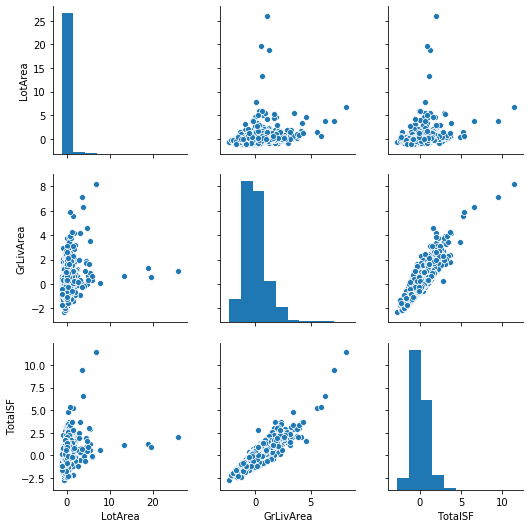

In [137]:
ax = sns.pairplot(numeric_features_standardized)

In [138]:
def get_score(prediction, lables):    
    print('R2: {}'.format(r2_score(prediction, lables)))
    print('RMSE: {}'.format(np.sqrt(mean_squared_error(prediction, lables))))

In [139]:
def train_test(estimator, x_trn, x_tst, y_trn, y_tst):
    prediction_train = estimator.predict(x_trn)
    # Printing estimator
    print(estimator)
    # Printing train scores
    get_score(prediction_train, y_trn)
    prediction_test = estimator.predict(x_tst)
    # Printing test scores
    print("Test")
    get_score(prediction_test, y_tst)

In [140]:
### Splitting features
train_feat = df_full.loc['df_train'].drop('Id', axis=1).select_dtypes(include=[np.number]).values
test_feat = df_full.loc['df_test'].drop('Id', axis=1).select_dtypes(include=[np.number]).values

### Splitting standardized features
train_features_st = df_full_stand.loc['df_train'].drop('Id', axis=1).select_dtypes(include=[np.number]).values
test_features_st = df_full_stand.loc['df_test'].drop('Id', axis=1).select_dtypes(include=[np.number]).values

In [141]:
### Shuffling train sets
train_features_st, train_feat, df_train_lab = shuffle(train_features_st, train_feat, df_train_lab, random_state = 5)

In [142]:
### Splitting
x_train, x_test, y_train, y_test = train_test_split(train_feat, df_train_lab, test_size=0.1, random_state=200)
x_train_st, x_test_st, y_train_st, y_test_st = train_test_split(train_features_st, df_train_lab, test_size=0.1, random_state=200)

In [143]:
def get_performance(model_name, model, x_test, y_test, y_pred):
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  score = model.score(x_test, y_test)
  return mse, rmse, score

In [144]:
def fit_pred( model, x_train, y_train, x_test):
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  plt.scatter(y_test, y_pred); plt.show()
  return y_pred

In [145]:
lin_reg = LinearRegression(fit_intercept = True)

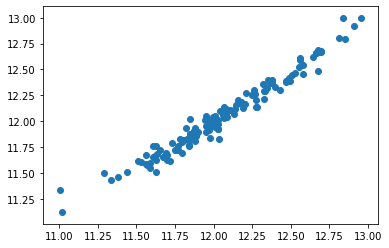

In [146]:
lin_pred = fit_pred(lin_reg, x_train, y_train, x_test)

In [147]:
train_test(lin_reg, x_train, x_test, y_train, y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
R2: 0.9754783703258602
RMSE: 0.06223275450172537
Test
R2: 0.9568437774883061
RMSE: 0.07243696198848254


In [149]:
ridge_reg = Ridge(alpha = 1, solver = 'cholesky',
                fit_intercept = True,
                normalize = False,
                random_state = 2)

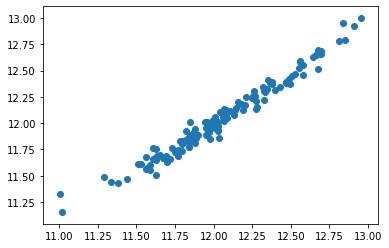

In [150]:
ridge_pred = fit_pred(ridge_reg, x_train, y_train, x_test)

In [151]:
train_test(ridge_reg, x_train, x_test, y_train, y_test)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=2, solver='cholesky', tol=0.001)
R2: 0.9744788640307116
RMSE: 0.06335130458877042
Test
R2: 0.9613866521343641
RMSE: 0.06826676479789516


In [152]:
en_reg = ElasticNet(alpha = 0.1, l1_ratio = 0.5,
                max_iter=10000, tol=0.01,
                fit_intercept = True,
                normalize = False,
                random_state = 2)

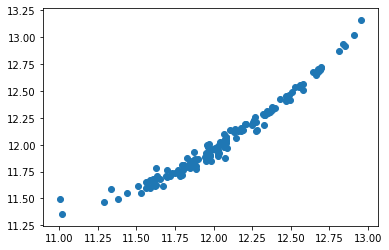

In [153]:
en_pred = fit_pred(en_reg, x_train, y_train, x_test)

In [154]:
train_test(en_reg, x_train, x_test, y_train, y_test)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=10000, normalize=False, positive=False, precompute=False,
           random_state=2, selection='cyclic', tol=0.01, warm_start=False)
R2: 0.9166273171144916
RMSE: 0.11146831034462369
Test
R2: 0.94330603280739
RMSE: 0.08416821497424268


In [155]:
features = df_full.columns.values

In [157]:
tree_reg = DecisionTreeRegressor(max_depth=10, max_features = 5, random_state=0)

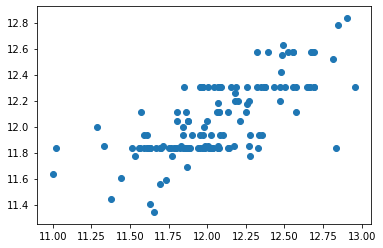

In [158]:
dt_pred = fit_pred(tree_reg, x_train, y_train, x_test)

In [159]:
train_test(tree_reg, x_train, x_test, y_train, y_test)

DecisionTreeRegressor(criterion='mse', max_depth=10, max_features=5,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')
R2: 0.27764809850629213
RMSE: 0.26050639603538733
Test
R2: 0.1516382238948769
RMSE: 0.25917584463308574
